<h1> Dataset <h1>
<h4 style = "line-height: 200%; font-weight: lighter;"> The definition of attrition is in Oxford’s English dictionary defined as: <br> <i><b> "The gradual reduction of a workforce by employees leaving and not being replaced rather than by redundancy." </i></b>

The chosen business case for this course is based on the dataset “Employee Attrition”, which consists of 35 columns and approximately 1400 rows of data about an organization’s employees. 
The dataset is found on the website “Kaggle.com” in a notebook. The goal of this business case is to find patterns in the data using analysis that can tell us why workers quit their job. Moreover the dataset consists of labeled data, which makes it very relevant to perform classification training and prediction on the data using R programming language.
</h4>

<h1> Business problem <h1>
<h4 style = "line-height: 200%; font-weight: lighter;"> 
The business question we want to answer in this project is based on the attrition data and interest in the issue of employees leaving their jobs. This knowledge is relevant for the company as a strong decision foundation to either prevent employees from leaving or start a hiring process. Out concrete problem-question is therefore as follows:

<b><br><i>To what extent do employees in a company quit their jobs based on parameters such as distance from home, monthly salary and job satisfaction?</i></b>

In the following we further describe how we are planning to give an answer to the question above. As our dataset contains many columns we have chosen to select the most relevant ones and tried to build a model that is able to somewhat accurately define attrition based on those chosen parameters. The purpose of this would be vital in a company setting as an organization can prepare for workforce loss by using data similar to our dataset about their employees.
</h4>

<h1> Loading the data<h1>
<h4 style = "line-height: 200%; font-weight: lighter;"> 
The data we are using in this project is the attrition-dataset from Kaggle.com and to do further analysis in R, we are loading the into our notebook. Luckyly the dataset has the the format type .csv which enable us to easyly load the data, using the read.csv function. 


<h4>

In [216]:
# git_url <- "https://github.com/Hammi007/R_bigdata/blob/3e35e40e35a28f7e460bac125f9b63384c1cc4f3/Employee_Attrition.csv"
# data <- read.csv(git_url, header = TRUE, stringsAsFactors = FALSE)
df <- read.csv("Employee_Attrition.csv", header = TRUE, stringsAsFactors = FALSE, strip.white = TRUE)


<h1> Exploring the basics of the dataset <h1>
<h4 style = "line-height: 200%; font-weight: lighter;"> 

To get a better understanding of the data, we have chosen to do a light exploration using four different R functions: dim, str, unique, is.na.
The reason we conduct this basic exploration is to gain quick insights about the structure of the data.

Using the <b>dim()</b>, we see that the dataset contains 1470 rows and 35 coloumns.
Through the <b>str()</b> function we see the different datatypes and can conclude that, only two datatypes are used: int and chr.
This also applies for columns with binary output e.g. 'Attrition' with "yes"/"no" values, or columns a few multiple values e.g. BusinessTravel with three diffent values.  

Using the <b>is.na()</b> we also see, that there are no missing values "NA", we have to take in consideration. 

<h4>

In [217]:
dim(df)
str(df)
unique(df$BusinessTravel)
table(is.na(df))

[1] 1470   35

'data.frame':	1470 obs. of  35 variables:
 $ Age                     : int  41 49 37 33 27 32 59 30 38 36 ...
 $ Attrition               : chr  "Yes" "No" "Yes" "No" ...
 $ BusinessTravel          : chr  "Travel_Rarely" "Travel_Frequently" "Travel_Rarely" "Travel_Frequently" ...
 $ DailyRate               : int  1102 279 1373 1392 591 1005 1324 1358 216 1299 ...
 $ Department              : chr  "Sales" "Research & Development" "Research & Development" "Research & Development" ...
 $ DistanceFromHome        : int  1 8 2 3 2 2 3 24 23 27 ...
 $ Education               : int  2 1 2 4 1 2 3 1 3 3 ...
 $ EducationField          : chr  "Life Sciences" "Life Sciences" "Other" "Life Sciences" ...
 $ EmployeeCount           : int  1 1 1 1 1 1 1 1 1 1 ...
 $ EmployeeNumber          : int  1 2 4 5 7 8 10 11 12 13 ...
 $ EnvironmentSatisfaction : int  2 3 4 4 1 4 3 4 4 3 ...
 $ Gender                  : chr  "Female" "Male" "Male" "Female" ...
 $ HourlyRate              : int  94 61 92 56 40 79 8

[1] "Travel_Rarely"     "Travel_Frequently" "Non-Travel"


FALSE 
51450 

<h1> Cleaning and transformation of the data <h1>
<h4 style = "line-height: 200%; font-weight: lighter;"> After exploring the overall structure of the data, we want to conduct the following transformation-steps: <br><br>
    <i>
        Step 1: Remove irrelevant columns<br>
        Step 2: Remove quotation ("") from the dataset <br>
        Step 3: Transforming columns whith binary and a multiple values to factors.<br> 
    <i>
<h4>

In [218]:
#Step 1: Keeping a selection of relevant columns
selection <- c(
    "Age", "Attrition", "BusinessTravel", "DistanceFromHome",
    "EducationField", "EnvironmentSatisfaction", "Gender", "HourlyRate",
    "JobInvolvement", "JobRole", "JobSatisfaction", "MaritalStatus",
    "MonthlyIncome", "NumCompaniesWorked", "OverTime", "RelationshipSatisfaction", # nolint
    "TotalWorkingYears", "TrainingTimesLastYear", "YearsAtCompany",	"YearsInCurrentRole", # nolint
    "YearsSinceLastPromotion"
)
df <- df[selection]

#Step 2,3: Converting multivalues to factors and remvoving quotation ""
df$Attrition <- factor(df$Attrition, levels = c("Yes", "No"), labels = c("Yes", "No")) # nolint
df$BusinessTravel <- factor(df$BusinessTravel, levels = c("Travel_Rarely", "Travel_Frequently", "Non-Travel"), # nolint
                            labels = c("Travel_Rarely", "Travel_Frequently", "Non-Travel"))# nolint
df$EducationField <- factor(df$EducationField, levels = c("Life Sciences","Other","Medical","Marketing","Technical Degree","Human Resources"), # nolint
                            labels = c("Life Sciences","Other","Medical","Marketing","Technical Degree","Human Resources")) # nolint
df$EnvironmentSatisfaction <- factor(df$EnvironmentSatisfaction, levels = c(1,2,3,4), labels = c(1,2,3,4)) # nolint
df$Gender <- factor(df$Gender, levels = c("Male", "Female"), labels = c("Male", "Female")) # nolint
df$JobInvolvement <- factor(df$JobInvolvement, levels = c(1,2,3,4), labels = c(1,2,3,4)) # nolint
df$JobRole <- factor(df$JobRole, levels = c("Sales Executive","Research Scientist","Laboratory Technician", # nolint
                                            "Manufacturing Director","Healthcare Representative","Manager","Sales Representative", # nolint
                                            "Research Director","Human Resources"), # nolint
                     labels = c("Sales Executive","Research Scientist","Laboratory Technician","Manufacturing Director","Healthcare Representative","Manager","Sales Representative","Research Director","Human Resources")) # nolint
df$JobSatisfaction <- factor(df$JobSatisfaction, levels = c(1,2,3,4), labels = c(1,2,3,4)) # nolint
df$MaritalStatus <- factor(df$MaritalStatus, levels = c("Single","Married","Divorced"), labels = c("Single","Married","Divorced")) # nolint
df$OverTime <- factor(df$OverTime, levels = c("Yes", "No"), labels = c("Yes", "No")) # nolint
df$RelationshipSatisfaction <- factor(df$RelationshipSatisfaction, levels = c(1,2,3,4), labels = c(1,2,3,4)) # nolint
df$TrainingTimesLastYear <- factor(df$TrainingTimesLastYear, levels = c(0,1,2,3,4,5,6), labels = c(0,1,2,3,4,5,6)) # nolint
#df$WorkLifeBalance <- factor(df$WorkLifeBalance, levels = c(1,2,3,4), labels = c(1,2,3,4), ordered = TRUE) # nolint


<h3>Exploratory data analysis<h3>
<h4 style = "line-height: 200%; font-weight: lighter;"> In this section we are using R-tools to furhter explore the data. Since our business case is havely based on attrition in a company, we will start invenstigating the categorical value 'Attrition'.
We have already established that it is relevant to perform classification in this project in order to find a solution for the business case. Before doing any classification, we perform data preprocessing in order to prepare our data to be trained on by a classification model. The purpose of preprocessing is to clean and or transform data if necessary and is an important step when dealing with data on a broad level. The labeled data points can be observed on the column “Attrition”, which implies under which circumstances the attrition in this company has been yes and no respectively. The following figure displays the distribution of data of each label in the dataset:
<h4>

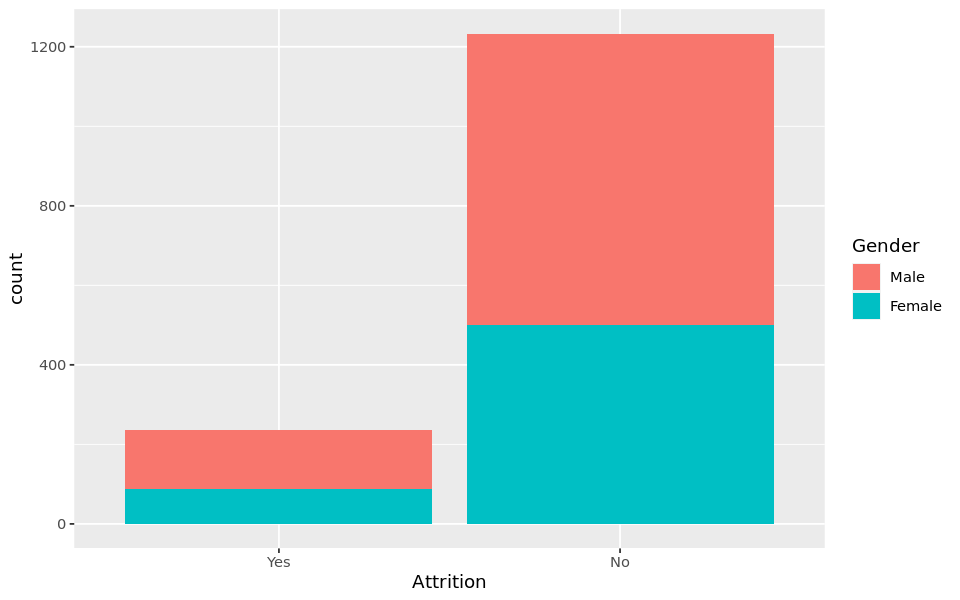

In [219]:
library(tidyverse); library(ggplot2)

options(repr.plot.width = 8, repr.plot.height = 5)
ggplot(df, aes(x = Attrition)) + geom_bar(aes(fill = Gender))

<h4 style = "line-height: 200%; font-weight: lighter;">
This imbalance noticed above will cause a skewed classification model, hence why we conduct an undersampling operation in order to equalize the amount of data with each label in the dataset. An undersampling operation means taking an appropriate sample of the minority label class and matching the amount of data points to that specific amount of the opposing label class. The imbalance issue will be addressed in the bigging of chapter "Supervised learning - classification" where an undersampling operation will be performed.
<h4>


<h3>In the following we will try to further explore our data by visualizing </h3>
<h4 style = "line-height: 200%; font-weight: lighter;">How does the following parameters influence the attrition:<h4>

<ul style = "">
  <li style = "margin-bottom: 10px;">DistanceFromHome</li>
  <li style = "margin-bottom: 10px;">JobSatisfaction</li>
  <li style = "margin-bottom: 10px;">MonthlyIncome</li>
</ul>


<h4 style = "line-height: 200%; font-weight: lighter;">
The following code is neccessary for the following data exploration as we are interested in exploring whether there is a noticable visual difference between the employees with attrition "Yes" compared to "No" with parameters DistanceFromHome, JobSatisfaction and MonthlyIncome in mind. 
<h4>

In [220]:
#Filter rows with attrition yes and no respectively:
df_yes <- filter(df, Attrition == "Yes")
df_no <- filter(df, Attrition == "No")

<h4> <b>JobSatisfaction</b><h4>
<h4 style = "line-height: 200%; font-weight: lighter;">In the following we see two visual representations of the Jobsatisfaction of the employees with Attrition: "No" and "Yes"<h4>

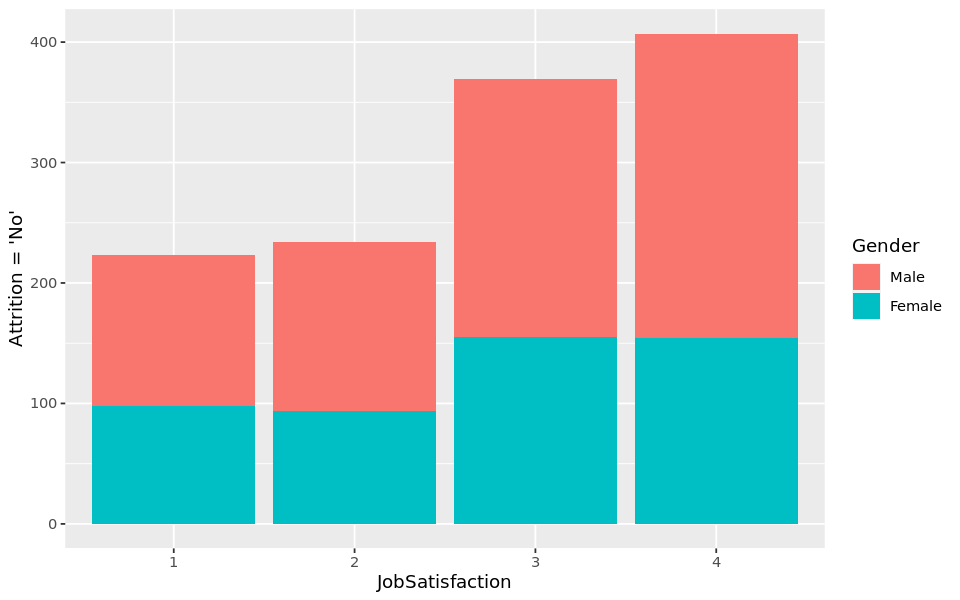

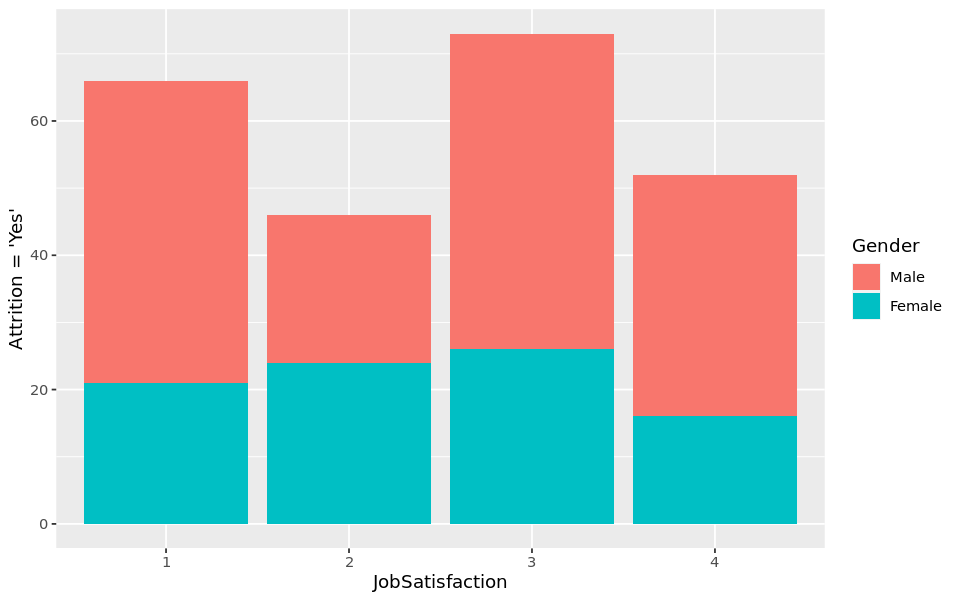

In [221]:


ggplot(df_no, aes(x = JobSatisfaction), y = Attrition) + geom_bar(aes(fill = Gender)) + ylab("Attrition = 'No'") # nolint
ggplot(df_yes, aes(x = JobSatisfaction), y = Attrition) + geom_bar(aes(fill = Gender)) + ylab("Attrition = 'Yes'") # nolint

<h4><b>DistanceFromHome</b><h4>
<h4 style = "line-height: 200%; font-weight: lighter;">In the following we see two visual representations of the employees DistanceFromHome with Attrition: "No" and "Yes"<h4>

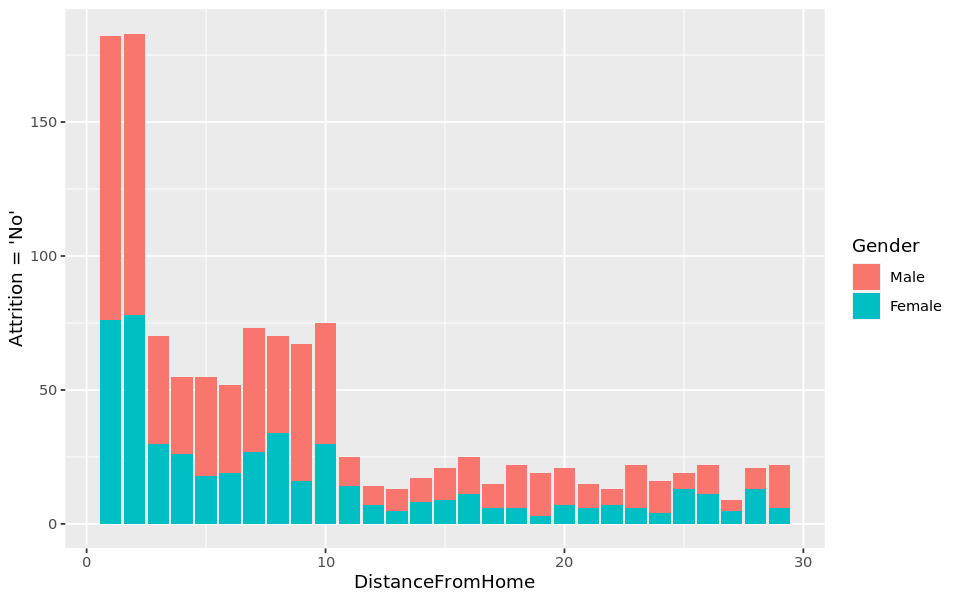

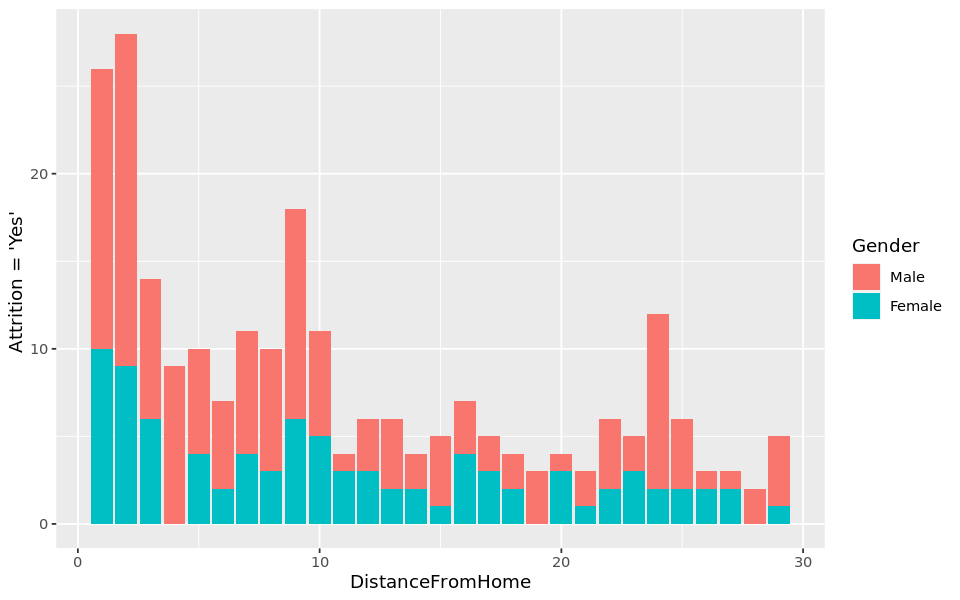

In [222]:
ggplot(df_no, aes(x = DistanceFromHome), y = Attrition) + geom_bar(aes(fill = Gender)) + ylab(" Attrition = 'No' ") # nolint
ggplot(df_yes, aes(x = DistanceFromHome), y = Attrition) + geom_bar(aes(fill = Gender)) + ylab("Attrition = 'Yes' ") # nolint

<h4><b>MonthlyIncome</b><h4> 
<h4 style = "line-height: 200%; font-weight: lighter;">In the following we see two visual representations of the employees MonthlyIncome with Attrition: "No" and "Yes"<h4>

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


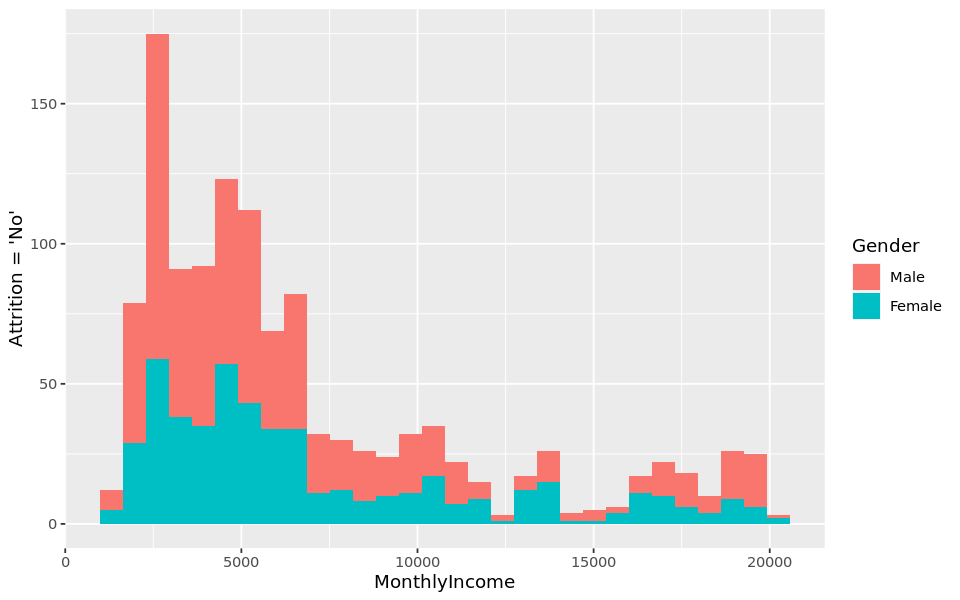

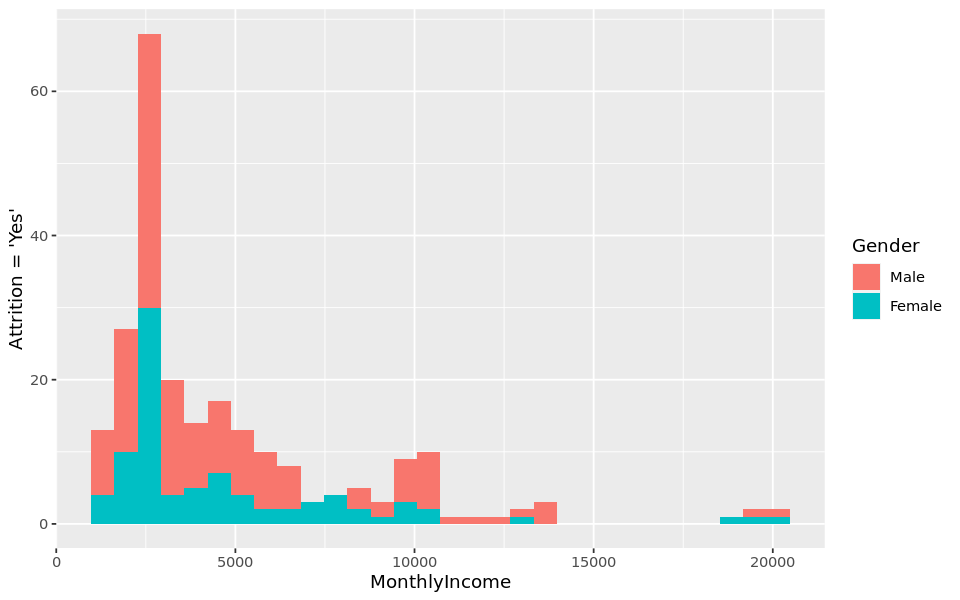

In [223]:
ggplot(df_no) + aes(x = MonthlyIncome) + geom_histogram(aes(fill=Gender)) + ylab("Attrition = 'No'") # nolint
ggplot(df_yes) + aes(x = MonthlyIncome) + geom_histogram(aes(fill=Gender)) + ylab("Attrition = 'Yes'") # nolint

<h1>Spervised learning - Classification<h1>
<h4 style = "line-height: 200%; font-weight: lighter;">
Supervised learning is a technique used in data science to use labeled data in order to learn to predict labels on similar data that is unseen by a given model. Supervised learning generalizes based on known labels about certain data and automates decision making processes based on predictions. Supervised learning consists of a training and testing process, where training is the phase of generating a model and testing is the process of applying the model to new unseen data also known as a test sample. The following will use supervised learning in order to attempt to give an answer to the business problem since the dataset includes labeled data.

<h4>

<h3>Undersampling<h3>
<h4 style = "line-height: 200%; font-weight: lighter;">
Since our data is imbalanced we need to perform an undersampling operation.
The result will then be visualized for showing the undersampling impact:
<h4>

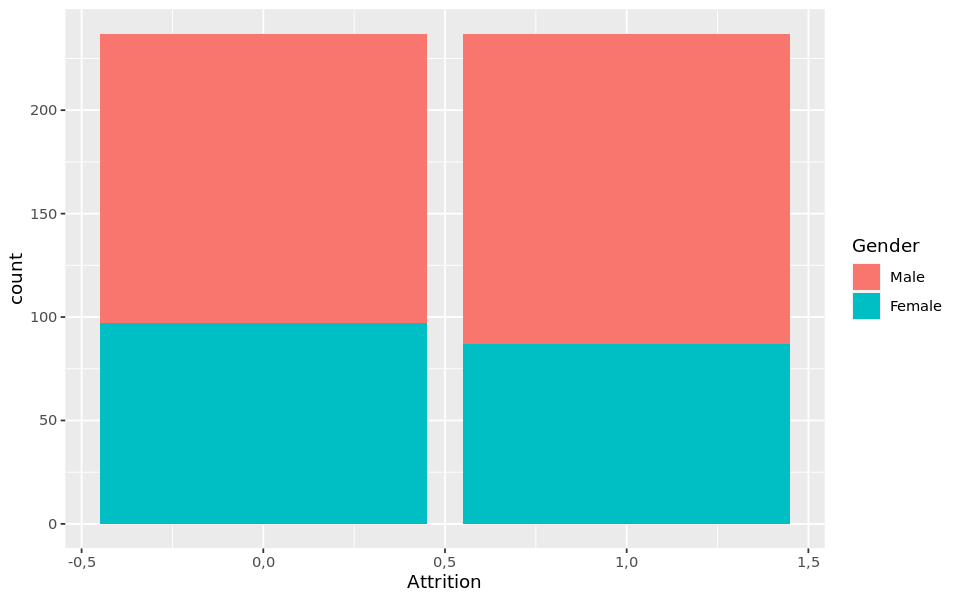

In [224]:
# Installing the package
#install.packages("caTools")    # For Logistic regression
#install.packages("ROCR")       # For ROC curve to evaluate model   
# Loading package
library(caTools)

#Balancing data: (undersampling)
yes <- which(df$Attrition == "Yes")
no <- which(df$Attrition == "No")
no <- sample(no, length(yes))
#Save as df2 so that df still can be used for clustering without being affected by undersampling:
df2 <- df[c(no,yes),] 

#Converting Yes and No to 1 and 0:
df2$Attrition <- ifelse(df2$Attrition == "Yes", 1, 0)

#Plotting attrition yes and no to visualize the impact of undersampling:
ggplot(df2, aes(x = Attrition)) + geom_bar(aes(fill = Gender))

<h4 style = "line-height: 200%; font-weight: lighter;">
After conducting an undersampling operation, we are affected by one of the cons of using this technique, which is sacrificing data. This operation results in the plot shown above with reference to the same plot without undersampling.
<h4>

<h1>Train and test split<h1>
<h4 style = "line-height: 200%; font-weight: lighter;">
Train and test split
Train and test split prepares our data for classification training as we need to train a classifier on a training sample and then test its ability to predict on a training sample that the model has not yet seen. For the train and test split we use the following code in R programming language:

<h4>
    

In [225]:

#Train/test split and Classification:
split <- sample.split(df, SplitRatio = 0.7)
   
train_reg <- subset(df2, split == "TRUE")
test_reg <- subset(df2, split == "FALSE")

<h4 style = "line-height: 200%; font-weight: lighter;">
This section displays the operations conducted to train a batch of the dataset in order to later predict attrition based on parameters provided about a given employee. The following code initiates classification training of a logistic regression classification model:

<h4>

In [226]:
logistic_model <- glm(Attrition ~.,
                      data = train_reg,
                      family = "binomial")
   
# Summary
summary(logistic_model)


Warning message in printCoefmat(coefs, digits = digits, signif.stars = signif.stars, :
“NAs introduced by coercion”


Call:
glm(formula = Attrition ~ ., family = "binomial", data = train_reg)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2,1210  -0,6537   0,0662   0,5472   3,5617  

Coefficients:
                                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)                       6,619e+00  1,923e+00   3,443 0,000576 ***
Age                              -2,086e-02  2,756e-02  -0,757 0,449082    
BusinessTravelTravel_Frequently   1,291e+00  4,723e-01   2,732 0,006289 ** 
BusinessTravelNon-Travel         -6,175e-01  6,563e-01  -0,941 0,346773    
DistanceFromHome                  7,961e-02  2,160e-02   3,685 0,000229 ***
EducationFieldOther               7,409e-01  6,952e-01   1,066 0,286506    
EducationFieldMedical             5,490e-01  4,374e-01   1,255 0,209381    
EducationFieldMarketing           4,681e-01  6,535e-01   0,716 0,473758    
EducationFieldTechnical Degree    1,113e+00  6,130e-01   1,816 0,069320 .  
EducationFieldHuman Resources     2,

<h4 style = "line-height: 200%; font-weight: lighter;">
After acquiring a fully trained model, prediction is performed on the test batch data, whereafter these predictions accuracy is calculated. These operations are performed using the following code in R programming:
<h4>

In [227]:
# Predict test data based on model
predict_reg <- predict(logistic_model,
                       test_reg, type = "response")
predict_reg


1196          352          468         1106         1125         1431 
6,013954e-03 1,522412e-01 4,826857e-01 6,274093e-01 6,894072e-01 3,650036e-04 
        1192          535          898          654          303         1065 
5,180307e-01 3,150242e-04 8,405305e-02 5,755547e-02 6,037287e-01 3,221500e-02 
        1346         1352         1105          521          975          121 
3,426556e-01 1,410198e-03 4,006263e-01 2,844772e-01 5,729378e-01 7,589379e-01 
         752          989         1051          425          520          868 
7,244774e-03 7,644606e-01 8,773400e-01 9,326754e-02 5,948008e-02 2,662400e-02 
         153          603         1285          497          429         1075 
8,664049e-01 6,143659e-02 3,705546e-03 9,630993e-01 4,220130e-02 7,025967e-01 
         299         1136          901          477          418          769 
8,075190e-01 2,500723e-03 1,077664e-01 7,317451e-01 9,505217e-05 4,965170e-01 
          79         1433         1119          538         1115         1029 
1,962671e-02 5,738633e-03 1,829677e-01 2,231064e-02 7,114205e-01 5,170389e-01 
         231          972         1010          229          957         1388 
1,151549e-01 2,709293e-03 3,985853e-04 2,034349e-01 5,571479e-02 2,691872e-01 
         926          841          420         1167          619          810 
6,800275e-01 2,689998e-01 1,086135e-01 6,858086e-03 8,397913e-01 1,180493e-03 
         145          273          854         1302         1117          320 
3,979525e-01 6,121838e-02 1,969060e-01 1,425942e-02 5,579852e-03 8,873877e-01 
         847          704         1204          283         1138          447 
4,819436e-03 1,124175e-01 4,171297e-01 3,677469e-01 4,958173e-01 1,508644e-01 
        1041         1424          138         1101          628         1184 
1,188363e-04 7,661426e-02 1,127470e-02 8,417250e-01 1,454718e-02 1,640120e-01 
         388          513         1046          629          353         1381 
6,697944e-02 3,860213e-01 3,962317e-02 2,583787e-01 8,700444e-02 4,011438e-01 
        1218         1198           22           37           70           90 
2,319391e-02 9,206477e-01 4,542874e-01 9,644964e-01 6,574550e-01 1,356740e-01 
         103          108          123          137          193          217 
7,786671e-01 2,640396e-01 8,838351e-01 5,002921e-01 3,169673e-01 8,488212e-01 
         218          235          237          251          289          328 
2,995038e-02 8,516498e-01 7,641754e-01 8,810152e-02 9,781099e-01 7,828706e-01 
         369          371          383          386          415          437 
8,524218e-01 7,917283e-01 5,081782e-01 9,513222e-01 9,687413e-01 9,778699e-01 
         458          483          496          514          515          529 
9,944807e-01 5,073733e-01 1,461060e-01 7,342873e-01 9,948996e-01 9,252974e-01 
         569          596          637          646          661          663 
6,459926e-02 7,953385e-03 9,762914e-01 8,582819e-01 8,422698e-01 5,506772e-01 
         667          690          710          733          745          750 
1,817163e-01 9,075104e-01 8,275349e-01 9,010088e-01 9,592321e-01 1,022643e-02 
         753          763          790          799          830          832 
7,332546e-01 9,418638e-01 1,520563e-02 9,810472e-01 9,766130e-01 6,962812e-01 
         839          843          858          912          940          954 
9,590834e-01 4,524731e-01 1,815600e-01 9,983875e-01 2,497649e-01 5,807423e-01 
         967          981          982          998         1022         1040 
9,656043e-02 8,469022e-01 9,392179e-01 9,003147e-01 9,836207e-01 4,412948e-01 
        1069         1078         1086         1107         1112         1168 
9,488355e-01 6,236627e-01 7,911724e-01 9,146505e-02 2,465447e-04 9,915769e-01 
        1206         1238         1247         1256         1258         1272 
6,653306e-01 8,871086e-01 6,213189e-01 9,751277e-01 8,798621e-01 8,275888e-01 
        1292         1327         1354         1355       

<h4 style = "line-height: 200%; font-weight: lighter;">
The output seen above is the predictions produced by our classification model "logistic_model". The output consists of a number between 0 and 1 for each row in the test sample.
<h4>

<h4 style = "line-height: 200%; font-weight: lighter;">
One method of indicating a classification accuracy is by using the area under curve method. Area under curve [AUC] is a technique used to visually represent the accuracy of a classifier's predictions. The larger the area under the curve the higher is the accuracy of the classifier. In the following we use R-programming language to create an AUC curve:
<h4>

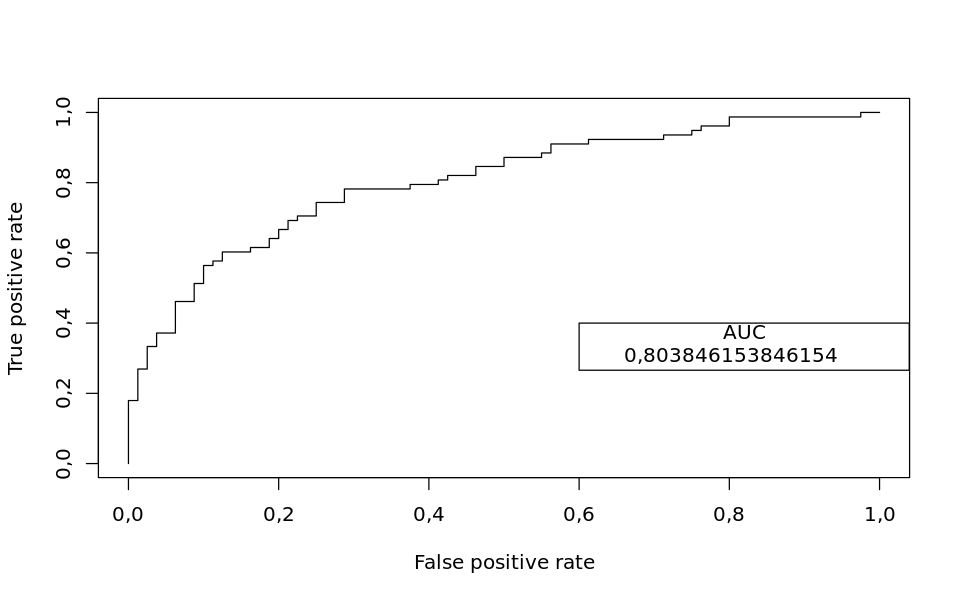

In [228]:
library(ROCR)
# ROC-AUC Curve
ROCPred <- prediction(predict_reg, test_reg$Attrition)
ROCPer <- performance(ROCPred, measure = "tpr",
                             x.measure = "fpr")
   
auc <- performance(ROCPred, measure = "auc")
auc <- auc@y.values[[1]]
   
# Plotting curve
plot(ROCPer)


legend(.6, .4, auc, title = "AUC", cex = 1)


<h4 style = "line-height: 200%; font-weight: lighter;">
The figure above takes the raw output from the classification predictions and visualizes the area under the curve.In order to calculate the accuracy of the predictions we use thresholding to define “yes” and “no” predictions as the predictions before thresholding are values between 0 and 1, where values closer to 1 indicate “yes” and values close to 0 indicate “no” for attrition.
    
The following creates a confusion matrix as well as calculating the accuracy of the trained classifcation model based on the predictions on the test batch:
<h4>

In [229]:
# Threshholding:
predict_reg <- ifelse(predict_reg > 0.5, 1, 0)
   
# Evaluating model accuracy
table(test_reg$Attrition, predict_reg)

missing_classerr <- mean(predict_reg != test_reg$Attrition)
print(paste('Accuracy =', 1 - missing_classerr))


   predict_reg
     0  1
  0 60 20
  1 20 58

[1] "Accuracy = 0,746835443037975"


<h3>Conclusion - supervised learning<h3>
<h4 style = "line-height: 200%; font-weight: lighter;">
    The accuracy shown above tells us that the trained logistic regression classifier is able to predict the test sample with an accuracy of 74%. The confusion matrix gives us insight into how many predictions for each class “Yes” and “No” were falsely or correctly identified.

We can conclude that in a given situation where a company is in possession of the same dataset we used in this project, the company can use supervised learning and classification for decision making regarding attrition with an approximately 74% chance of success. One could argue however that a larger dataset or a fewer parameter selection could result in a more representative and accurate model.

<h4>

<h3>Unsupervised learning - clustering<h3>
<h4 style = "line-height: 200%; font-weight: lighter;">
Unsupervised learning is a technique used in data science to contract information about data without any given label classes. A popular form of unsupervised learning is clustering, where clusters are created without any prior knowledge of each cluster's meaning. The clusters are created based on similarities between data objects according to the characteristics in the data, and grouping similar data objects into clusters.

Even though we are aware that our labeled dataset makes it relevant to work with classification, we still have an interest in performing a form of unsupervised learning such as clustering in order to explore the information we can acquire about the data without the usage of the labels.

For this purpose we firstly chose the columns “Age” and  “MonthlyIncome”. We chose these two columns because of our previous knowledge about monthly income from the exploratory data analysis chapter as well as the fact that we wanted to keep the clustering two-dimensional for visualization purposes. 

We noticed that the values in age and monthly income for the company employees have a scaling problem. The problem arises because monthly income values are considerably larger than age. Therefore the impact of the age column will not be noticable in the clustering and the data in question needs to be scaled - The impact of scaling will be shown later in the chapter. For this purpose we conduct a scaling operation to solve this problem. This operation counts a pre-processing operation as it prepares data to be correctly represented in our clustering.

The following figure shows the code that is responsible for this operation:
<h4>


In [230]:
df$scaledAge <- as.numeric(scale(df$Age))
df$scaledIncome <- as.numeric(scale(df$MonthlyIncome))

data <- select(df, scaledAge, scaledIncome)
summary(data)
scaledData <- data
head(scaledData,3)


   scaledAge        scaledIncome    
 Min.   :-2,0715   Min.   :-1,1669  
 1st Qu.:-0,7579   1st Qu.:-0,7629  
 Median :-0,1011   Median :-0,3364  
 Mean   : 0,0000   Mean   : 0,0000  
 3rd Qu.: 0,6651   3rd Qu.: 0,3985  
 Max.   : 2,5260   Max.   : 2,8667  

scaledAge,scaledIncome
"0,44619856","-0,1083127"
"1,32191535","-0,2916193"
"0,00834016","-0,9373347"


<h4 style = "line-height: 200%; font-weight: lighter;">
Hereafter we create an elbow graph which is used in clustering for deciding the number of clusters appropriate to have for a given dataset. The code for creating the elbow graph is as follows:
<h4>

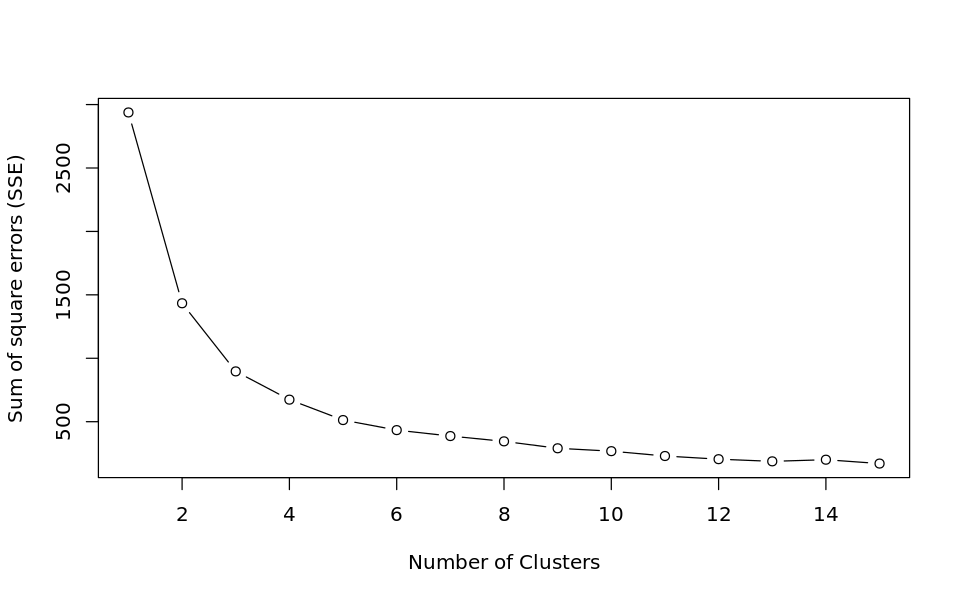

In [231]:
mydata <- scaledData
k_max <- 15
wss <- (nrow(mydata)-1)*sum(apply(mydata, 2, var))
for (i in 2:k_max) wss[i] <- sum(kmeans(mydata, centers=i)$withinss)
plot(1:k_max, wss, type="b", xlab="Number of Clusters",
     ylab="Sum of square errors (SSE)")

<h4 style = "line-height: 200%; font-weight: lighter;">
From the information gained from the outputted elbow graph we choose the number of clusters to be 6 because there are no significant changes after the 6nth cluster on the Elbow graph. Thereafter, the following code is executed in order to acquire and visualize the clusters:
    
The code makes use of the unscaled data in order to show the impact of scaling the data for the purpose of clustering. 

The output from the code is as follows:
<h4>

<h4>In the following we can se the impact of not scaling the data:<h4>

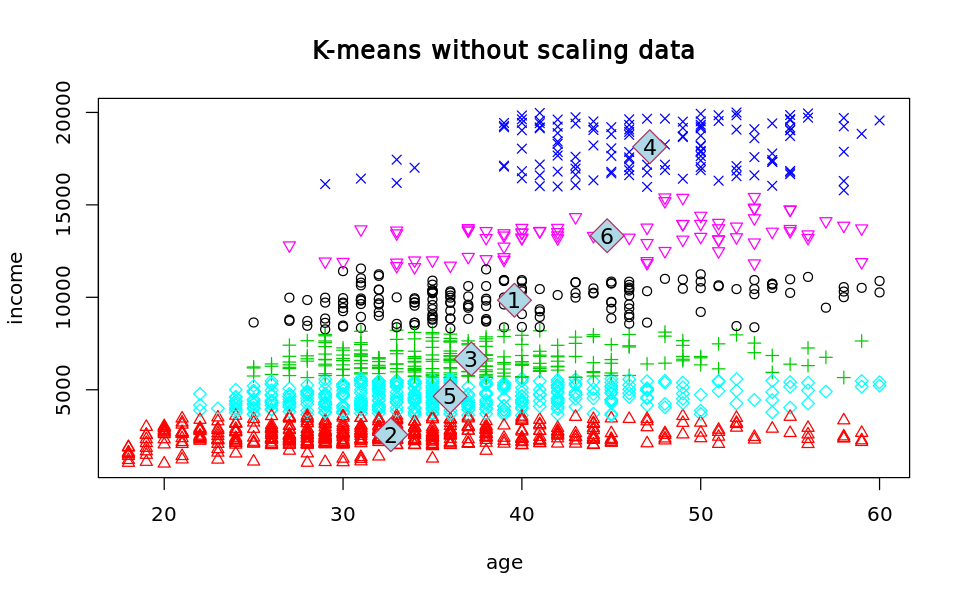

In [232]:
data_unscaled <- select(df, Age, MonthlyIncome)
Kmeans <- kmeans(data_unscaled, 6)

plot(data_unscaled$Age, data_unscaled$MonthlyIncome, col = Kmeans$cluster, #asp = 1, #xlim=c(1:90), ylim=c(200:178677),
     pch = Kmeans$cluster, main = "K-means without scaling data", 
     xlab = "age", ylab = "income")
points(Kmeans$centers[ ,1], Kmeans$centers[ ,2], pch = 23,
       col = 'maroon', bg = 'lightblue', cex = 3)
text(Kmeans$centers[ ,1], Kmeans$centers[ ,2], cex = 1.1,
     col = 'black', attributes(Kmeans$centers)$dimnames[[1]])


<h4 style = "line-height: 200%; font-weight: lighter;">
The plot displays six clusters as we chose earlier. We notice that the clusters created are not impacted by the “age” column as the values in the age column are considerably smaller than the ones in the monthly income column.
<h4>    

<h4>In the following we can see the impact of scaling the data:<h4>

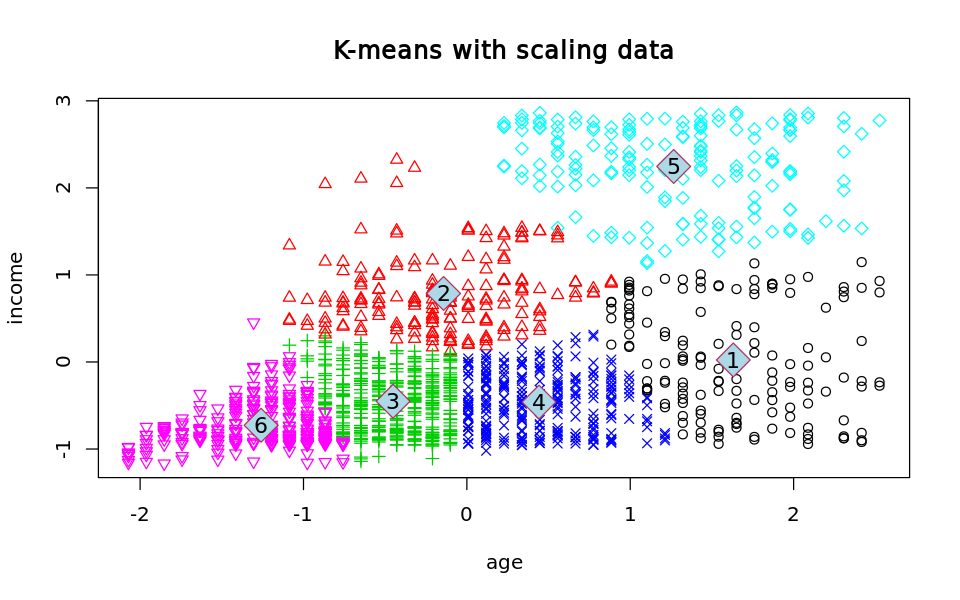

In [233]:
KmeansScaling <- kmeans(scaledData, 6)

plot(scaledData$scaledAge, scaledData$scaledIncome, col = KmeansScaling$cluster, #asp = 1, #xlim=c(1:90), ylim=c(200:178677),
     pch = KmeansScaling$cluster, main = "K-means with scaling data", 
     xlab = "age", ylab = "income")
points(KmeansScaling$centers[ ,1], KmeansScaling$centers[ ,2], pch = 23,
       col = 'maroon', bg = 'lightblue', cex = 3)
text(KmeansScaling$centers[ ,1], KmeansScaling$centers[ ,2], cex = 1.1,
     col = 'black', attributes(KmeansScaling$centers)$dimnames[[1]])

<h4 style = "line-height: 200%; font-weight: lighter;">
The plot above shows a clear difference in the clustering as a result of the impact of scaling the data. 
<h4>
    
<h3>Conclusion - unsupervised learning<h3>
<h4 style = "line-height: 200%; font-weight: lighter;">
The clustering output gives us insight into the data about the company’s employees based on their age and monthly income. This insight can be used to further investigate how each cluster is more or less likely to have the attrition yes or no. This investigation is beyond the scope of this project but was necessary to mention for the sake of demonstrating an understanding of how unsupervised learning and specifically clustering can be used to answer a question such as the one in this project.
<h4>

<h1>
Discussion
<h1>  
    
<h4 style = "line-height: 200%; font-weight: lighter;">
Dataset quality is very important when dealing with data and especially classification and or clustering. The quality definition is sometimes different based on the goal of the project and the problem that needs solving. For this project the datatset we have chosen was subject to undersampling because of the imbalance of the binary class types namely “Yes” and “No” for attrition. Moreover the size of the dataset has a big impact on the interpretation of the results. For example the classification accuracy we acquired in this project is not representative of how a logistic regression classifier will behave on a larger dataset with the same type of data. The representation would also be more accurate if we are dealing with a larger dataset. It is important to mention that a biger dataset would in some cases have storage and or computational power requirements. Especially in the case of this project the data would need to be treated carefully since it includes sensetive information about the employees. By treated carefully we mean that in a given situation, where a company was to do a similar project using a similar dataset, they would have to make sure to follow the GDPR rules. 
<h4>
<h4 style = "line-height: 200%; font-weight: lighter;">
One problem we could have faced if we did not choose to undersample our dataset, is a classification model that would only guess one class and still produce high prediction accuracy. For example we could get 90% accuracy where in reality the classification model is faulty and only guessing "NO" and 90% of the testing models data consists of "No" rows. Since the classification model learns from looking at a larger amount of one class compared to the other it becomes more likely to not guess the class that is the minority in the dataset. 
Moreover the quality of the dataset plays a big role in operations such as classification which was central in giving an answer to our business question. The quality of a dataset can be interperted in different ways, but the essense of quality lies in the level of which the data is representative of the whole company in our case.
<h4>

<h3>Ethics and legal issues<h3>
<h4 style = "line-height: 200%; font-weight: lighter;">
Our business case deals with sensitive data where parameters such as monthly income, job satisfaction and distance from home etc. describes the employee. Therefore, when dealing with this kind of data, it is crucial to handle these with care and respect, which sets demands to the company’s environment and security architecture, so all data describing the employee are kept safe. When storing sensitive data, it is important to take GDPR into consideration to be in compliance with the law and legal processes.

The final product of our project is a model that can predict if employees will leave the company or stay. The model is developed and to be used by a company e.g., a HR department, thus it is important to consider any ethical issues by using this tool. As the model is based on prediction and probability its output is not the solely truth and therefore cannot be used as such in decision making. The model can be used as a guide to evaluate if employees in a giving company are likely to leave, thus the company are able to take repercussions and either initiate hiring- or preventative processes in terms of wanting the employee to stay or leave. When using the model as guide in this process we would argue that no severe ethical issues arises, but if the model where to be used as the foundation in the decision making of re-hiring or make preventative processes to make the employee stay, one could argue that these decisions where based probability and not facts, why the decision could possibly be wrong and have negative consequences.
<h4>